# Data analysis example

This notebook describes an example of how to use the badge_data_analysis package to obtain the metrics of the meeting. It is strongly based on [this notebook](https://github.com/HumanDynamics/openbadge-analysis-examples/blob/master/notebooks/multi-channel_VAD_illustration.ipynb).

In [1]:
from badge_data_analysis import preprocessing
from badge_data_analysis import vad
from badge_data_analysis import metrics
from badge_data_analysis import plot

from datetime import datetime
import numpy as np

%matplotlib notebook

# Change matplotlib defaults
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

First, the data file is readed and the audio signal from each participant is plotted.

<IPython.core.display.Javascript object>


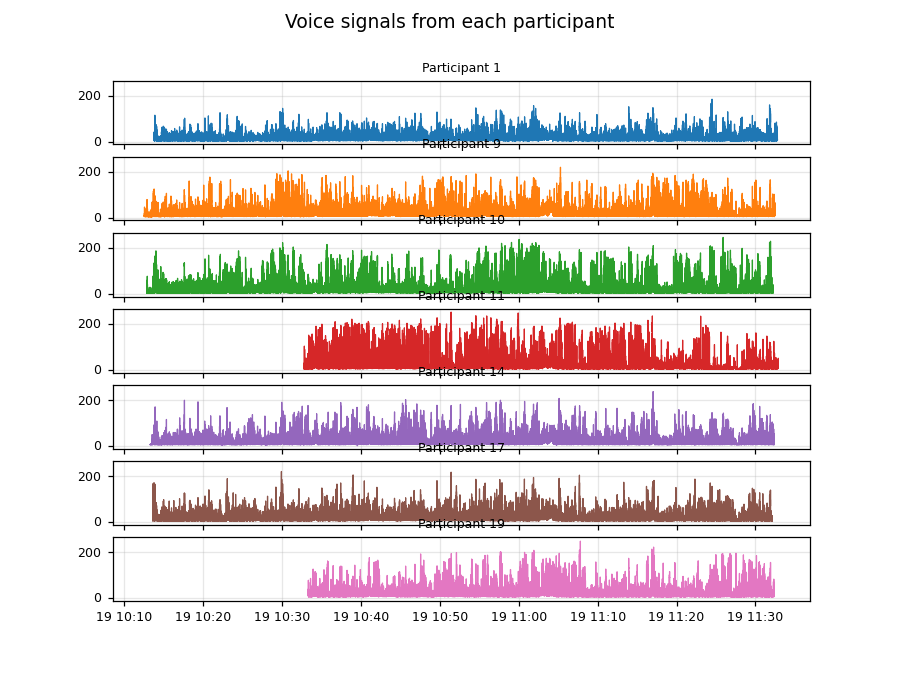

In [2]:
filename = 'data/audio_data_session_5.txt'
experiment_name = 'session_5'
save_plots = False

data = preprocessing.read_file(filename, excluded_members=[3,7,22])
# data = preprocessing.fix_time_jumps(data)

fig, axes = plot.signals(data)

if save_plots:
    fig.savefig('plots/raw_data_' + experiment_name)

<IPython.core.display.Javascript object>


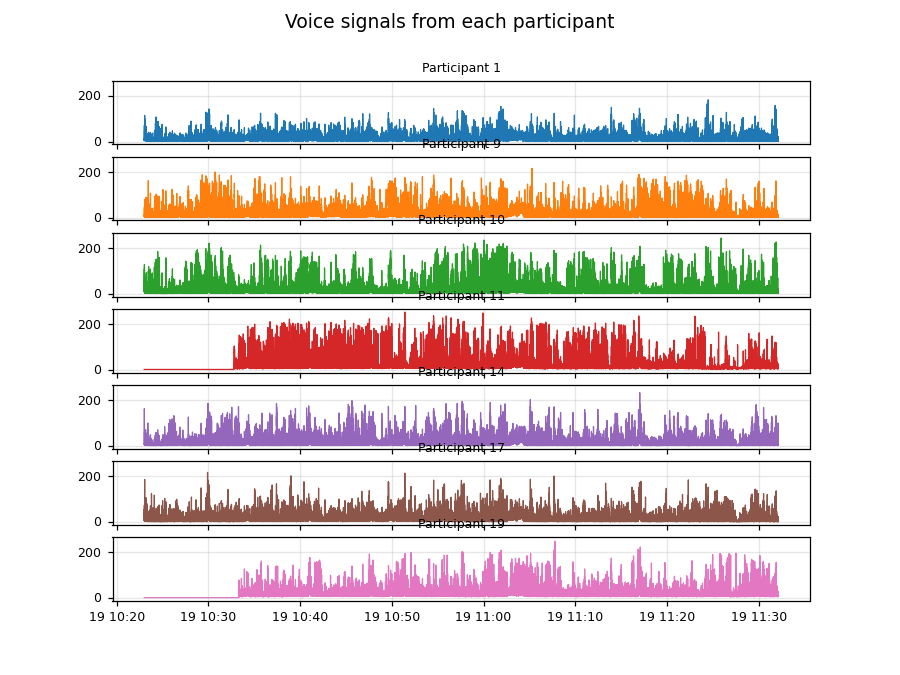

In [3]:
data.meeting_start = datetime(2022,3,19,10,23,0).timestamp()

data = preprocessing.truncate(data)
data = preprocessing.remove_offset(data)

fig, axes = plot.signals(data)

<IPython.core.display.Javascript object>


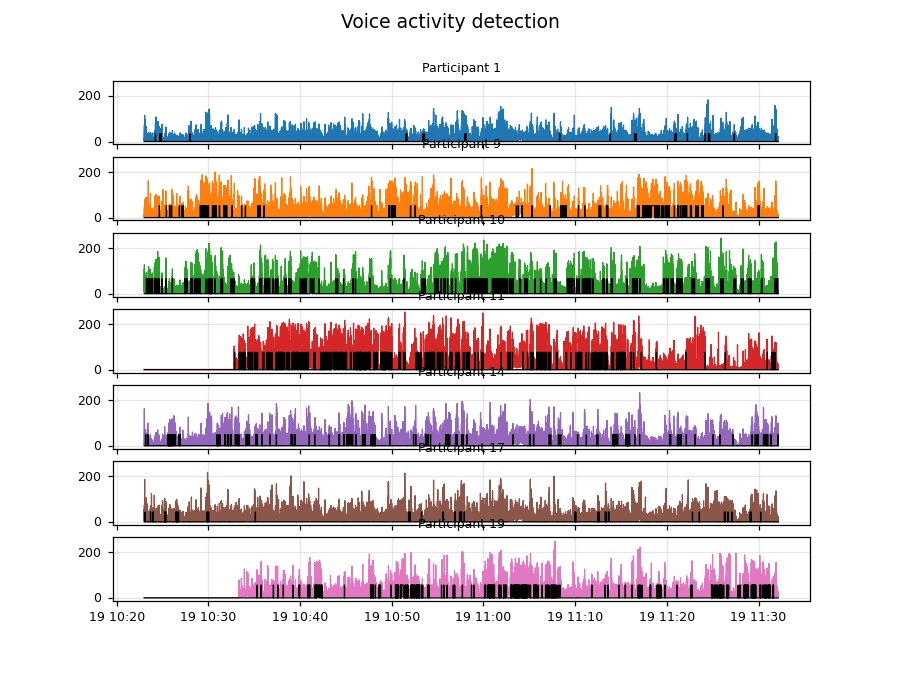

In [4]:
data = vad.genuine_speak(data)

fig, axes = plot.vad(data, all_speak=False, real_speak=False)

Member 1 mean thr: 17.2
Member 1 std  thr: 9.5
Member 9 mean thr: 28.2
Member 9 std  thr: 15.5
Member 10 mean thr: 28.1
Member 10 std  thr: 15.5
Member 11 mean thr: 33.5
Member 11 std  thr: 18.9
Member 14 mean thr: 25.4
Member 14 std  thr: 13.7
Member 17 mean thr: 24.5
Member 17 std  thr: 12.6
Member 19 mean thr: 29.6
Member 19 std  thr: 13.7


<IPython.core.display.Javascript object>


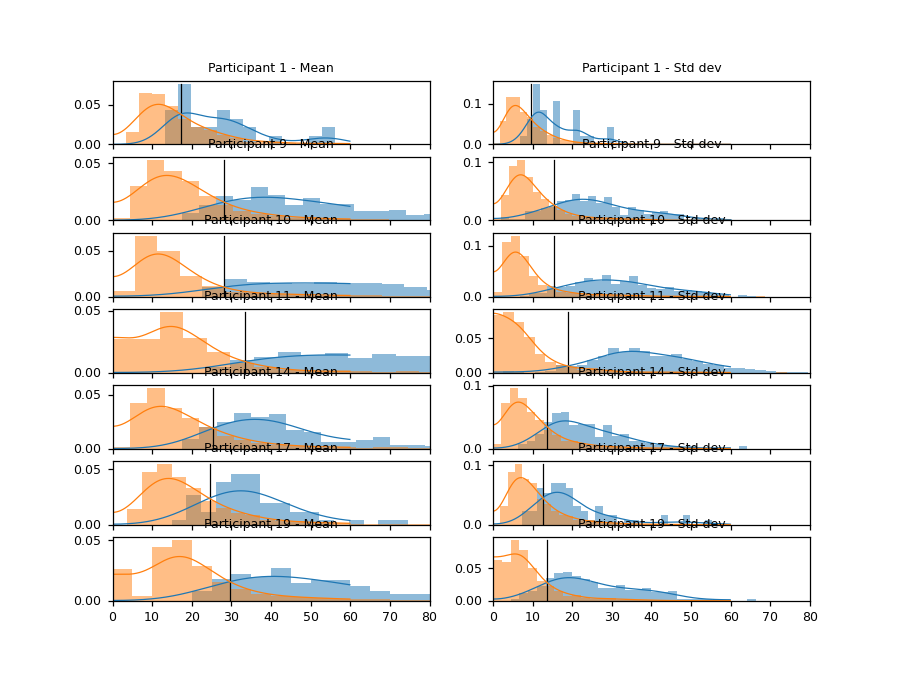

In [5]:
data = vad.calculate_thresholds(data, bandwidth=0.4)

fig, axes = plot.histograms(data, bandwidth=0.4)

if save_plots:
    fig.savefig('plots/histograms_' + experiment_name)

<IPython.core.display.Javascript object>


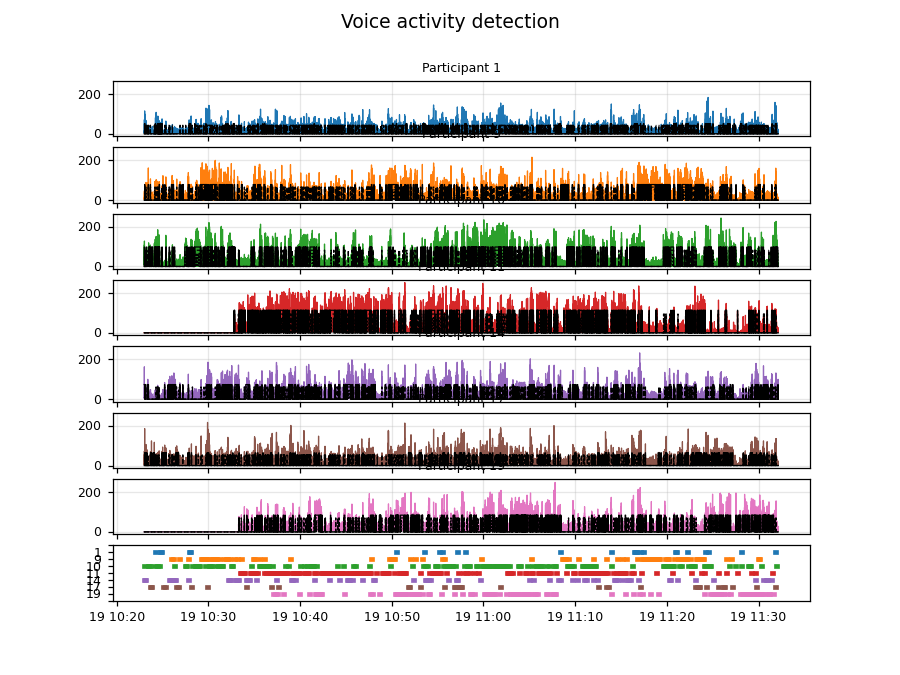

In [6]:
data = vad.all_speak(data)
data = vad.real_speak(data)

fig, axes = plot.vad(data)

if save_plots:
    fig.savefig('plots/vad_' + experiment_name)

Team vocalization distribution:
    Coefficient of variation:   0.54
    Dominance:                  2.07
    Total team participation:   102.35%
    Clean participation:        67.79%

Turn taking:
    Team turn taking frequency: 6.18 Turns/min
    Avgerage speech segment:    9.94 sec

Overlapping speech:
    Total overlap time:         34.57%
    Avgerage overlap duration:  1.44 sec


<IPython.core.display.Javascript object>


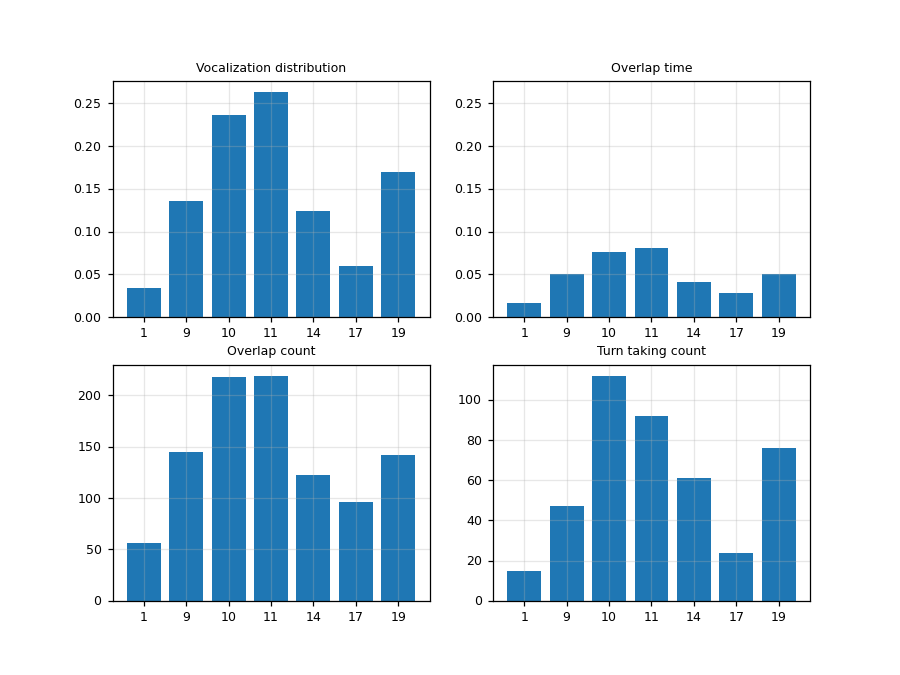

In [7]:
data = metrics.speaking_time(data)
data = metrics.overlap_time(data)
data = metrics.overlap_count(data)
data = metrics.turn_taking(data, min_succesive_non_overlap=2)
metrics.calculate_indicators(data)

fig, axes = plot.metrics(data)

if save_plots:
    fig.savefig('plots/metrics_' + experiment_name)

In [8]:
metric_names = ['speaking_time', 'overlap_time', 'overlap_count', 'turn_taking_count']
titles = ['Vocalization distribution', 'Overlap time', 'Overlap count', 'Turn taking count']

for metric, title in zip(metric_names, titles):
    print('\n' + title + ':')
    for member in data.members:
        metric_value = data[member][metric] if isinstance(data[member][metric], int) else np.round(data[member][metric], 3)
        print('    Participant ' + str(member) + ':', metric_value)


Vocalization distribution:
    Participant 1: 0.034
    Participant 9: 0.136
    Participant 10: 0.236
    Participant 11: 0.263
    Participant 14: 0.125
    Participant 17: 0.06
    Participant 19: 0.169

Overlap time:
    Participant 1: 0.017
    Participant 9: 0.051
    Participant 10: 0.076
    Participant 11: 0.081
    Participant 14: 0.041
    Participant 17: 0.029
    Participant 19: 0.05

Overlap count:
    Participant 1: 56
    Participant 9: 145
    Participant 10: 218
    Participant 11: 219
    Participant 14: 122
    Participant 17: 96
    Participant 19: 142

Turn taking count:
    Participant 1: 15
    Participant 9: 47
    Participant 10: 112
    Participant 11: 92
    Participant 14: 61
    Participant 17: 24
    Participant 19: 76
